based on http://scikit-learn.org/stable/modules/multiclass.html

#### Multiclass classification
- means a classification task with `more than two classes`; clasffify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each smaple is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

#### Multilabel classification
- assigns to each sample a set of target labels. This can be thought as predicting preperties of a data-point that are `not mutually exclusive`, such as topics that are relevant for a document. A text might be about any of religion,politics, finance or educcation at the same time or none of these.

#### Multioutput regression
- assigns each sample a set of target values. This can be thought of as predicting `several properties` for each data-point, such as wind direction and magnitude at a certain location.

#### Multioutput-multiclass classification and Multi-task classification
- means that a single estimator has to handle several joint classification tasks.

### Multilabel classification format
- In multilabel learning, the joint set of binary classification tasks is expressed with label binary indicator array
- Producing multilabel data as a list of sets of labels may be more intuitive.
- The `MultiLabelBinarizer` transformer can be userd to convert between a collection of collections of labels and the indicator format.

In [1]:
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

In [3]:
MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

### One vs Rest
- This strategy also known as one-vs-all, is implemented in `OneVsRestClassifier`.
- The strategy consists in fitting one classifier per class. Fro each classifier, the class is fitted against all the other classes.
- In addition to its computation efficiency, ne advantage of this approach is its interpretability. Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy and is a fair default choice.

In [6]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
iris = datasets.load_iris()
X,y = iris.data,iris.target
OneVsRestClassifier(GaussianNB()).fit(X,y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### One vs One
- construct one classifier per pair of classes. At prediction time, the class which received the most votes is selected.
- In the event of a tie,it selects the class with the hightest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.
- Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times.

In [7]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
iris = datasets.load_iris()
X,y = iris.data,iris.target
OneVsOneClassifier(GaussianNB()).fit(X,y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

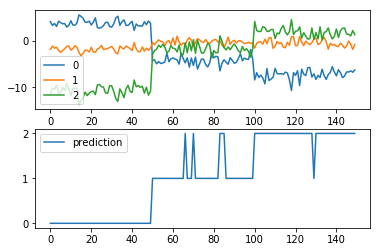

In [15]:
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

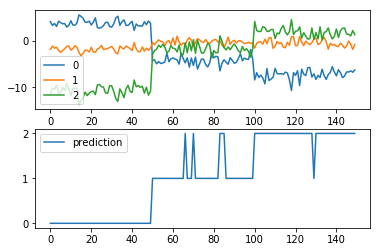

In [16]:
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

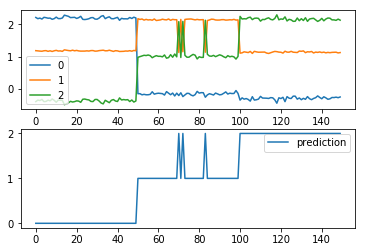

In [17]:
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()